              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


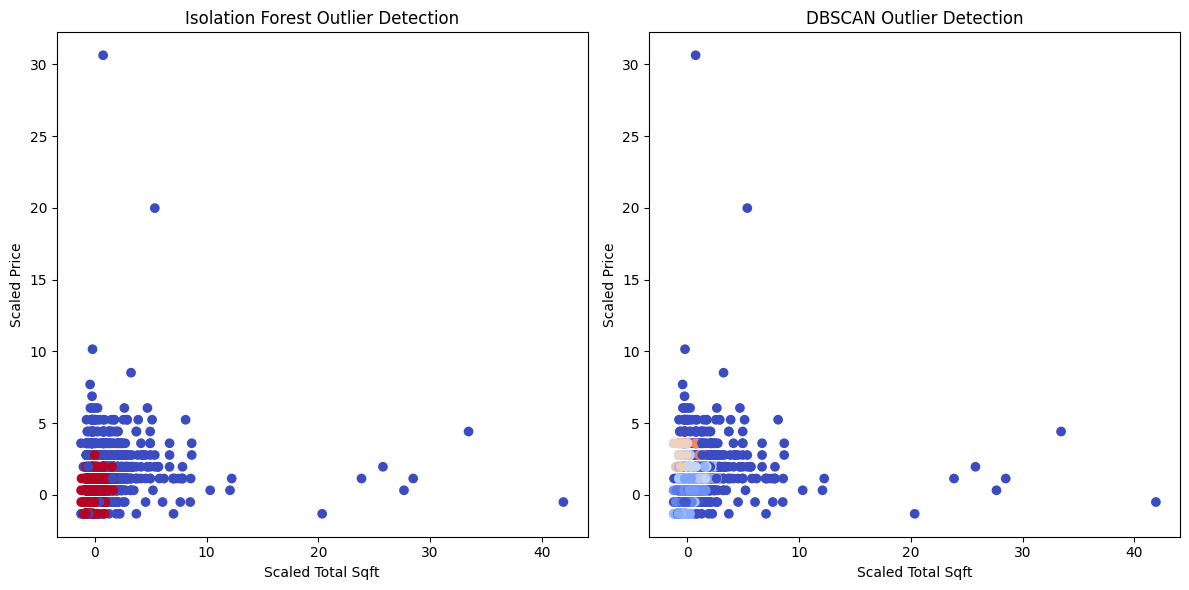

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Sem 8/ADS/Bengaluru_House_Data.csv')

# Display the first few rows of the dataset
print(data.head())

# Drop irrelevant columns
data = data.drop(["area_type", "availability", "location", "size", "society"], axis=1)

# Drop rows with missing values
data = data.dropna()

# Function to convert total_sqft to numeric (handling different formats)
def convert_to_numeric(x):
    try:
        return float(x)
    except:
        tokens = x.split('Sq. Meter')
        if len(tokens) == 2:
            return float(tokens[0]) * 10.764 # Convert Sq. Meter to Sq. ft
        else:
            return np.nan

# Convert total_sqft to numeric
data['total_sqft'] = data['total_sqft'].apply(convert_to_numeric)
data.head()

# Drop rows with missing or NaN values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1)
iso_forest.fit(data_scaled)
outliers_iso = iso_forest.predict(data_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
outliers_dbscan = dbscan.fit_predict(data_scaled)

# Visualize outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=outliers_iso, cmap='coolwarm')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Scaled Total Sqft')
plt.ylabel('Scaled Price')

plt.subplot(1, 2, 2)
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=outliers_dbscan, cmap='coolwarm')
plt.title('DBSCAN Outlier Detection')
plt.xlabel('Scaled Total Sqft')
plt.ylabel('Scaled Price')

plt.tight_layout()
plt.show()


In [ ]:
/content/drive/MyDrive/Sem 8/ADS/mumbai_rain.csv

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Sem 8/ADS/mumbai_rain.csv')

# Check if 'Timestamp' column exists
if 'Timestamp' in data.columns:
    # Drop unnecessary columns
    data = data.drop(['Timestamp'], axis=1)

# Replace spaces with underscores in column names
data.columns = [col.replace(' ', '_') for col in data.columns]

# Get the column names from the dataset
categorical_columns = [col for col in data.columns if col != 'Age' and col != 'Your_current_year_of_Study' and col not in ['What_is_your_CGPA?', 'What_is_your_CGPA_?']]
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Select numerical columns for DBSCAN
numerical_columns = ['Age', 'Your_current_year_of_Study']
cgpa_column = [col for col in data.columns if 'CGPA' in col]
if cgpa_column:
    numerical_columns.append(cgpa_column[0])

X = data[numerical_columns].values

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Get the indices of outliers
outlier_indices = [i for i, label in enumerate(labels) if label == -1]

# Print the outlier indices
print("Outlier indices:")
print(outlier_indices)

# Visualize the outliers (assuming there are only two numerical columns)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.title("DBSCAN Outlier Detection")
plt.show()

KeyError: "None of [Index(['Age', 'Your_current_year_of_Study'], dtype='object')] are in the [columns]"